In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from cycler import cycler

# 1D plots

## Line plot

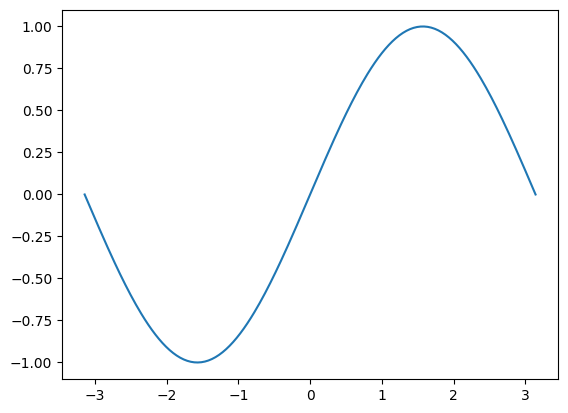

In [2]:
n = 256
x = np.linspace(-np.pi, np.pi, n)
y = np.sin(x)

fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()

### Fill-between

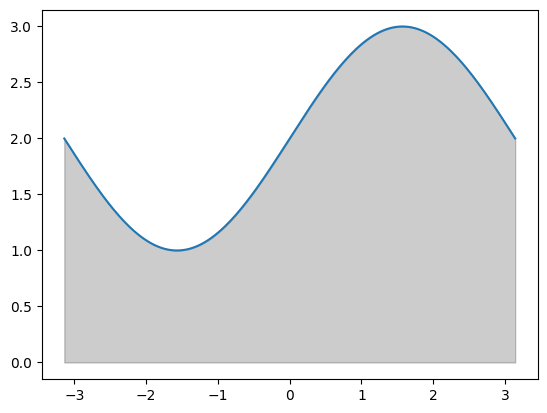

In [3]:
x = np.linspace(-np.pi, np.pi, n)
y1 = np.sin(x) + 2
y2 = np.sin(x) + 4

fig, ax = plt.subplots()
ax.plot(x, y1)
ax.fill_between(x, y1, 0, color="black", alpha=0.2)
plt.show()

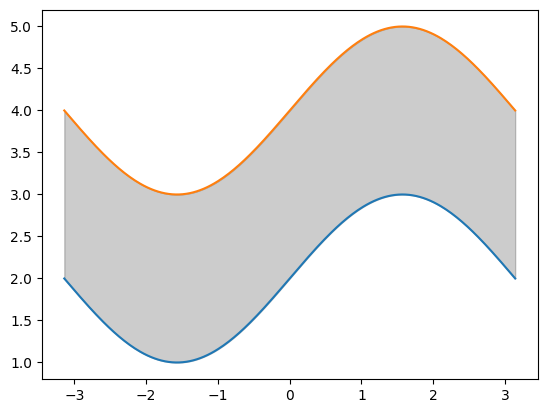

In [4]:
fig, ax = plt.subplots()
ax.plot(x, y1)
ax.plot(x, y2)
ax.fill_between(x, y1, y2, color="black", alpha=0.2)
plt.show()

## Histogram

In [5]:
n = 256
x = np.random.normal(0, 1, n)

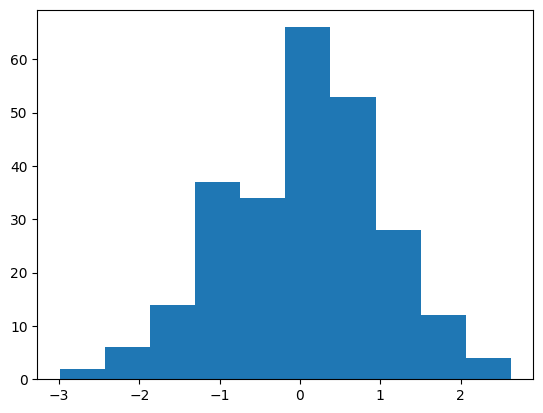

In [6]:
fig, ax = plt.subplots()
ax.hist(x)
plt.show()

### Normalized

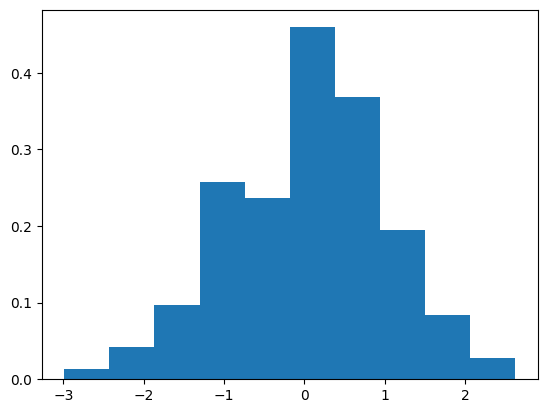

In [7]:
fig, ax = plt.subplots()
ax.hist(x, density=True)
plt.show()

### Cumulative

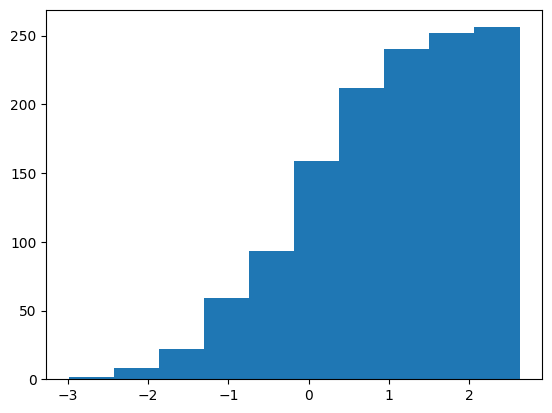

In [8]:
fig, ax = plt.subplots()
ax.hist(x, cumulative=True)
plt.show()

### Custom binning

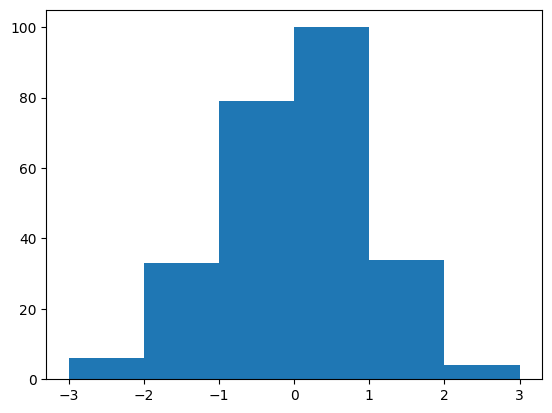

In [9]:
fig, ax = plt.subplots()
ax.hist(x, bins=[-3, -2, -1, 0, 1, 2, 3])
plt.show()

## Bar plots

In [10]:
x = [1, 2, 3, 4, 5]
y = [1, 2, 3, 4, 5]
x_err = [0.1, 0.2, 0.3, 0.4, 0.5]
y_err = [0.1, 0.2, 0.3, 0.4, 0.5]

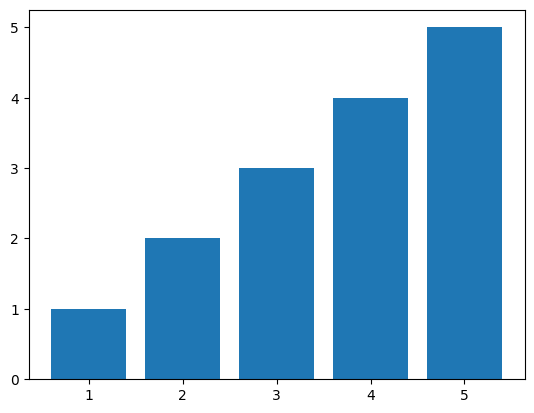

In [11]:
fig, ax = plt.subplots()
ax.bar(x, y)
plt.show()

### Error bars

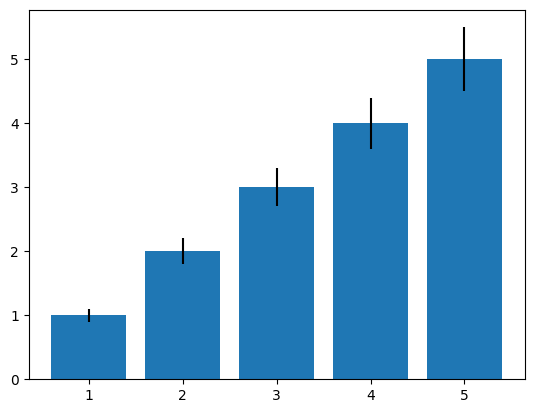

In [12]:
fig, ax = plt.subplots()
ax.bar(x, y, yerr=y_err)
plt.show()

### Horizontal bar plots

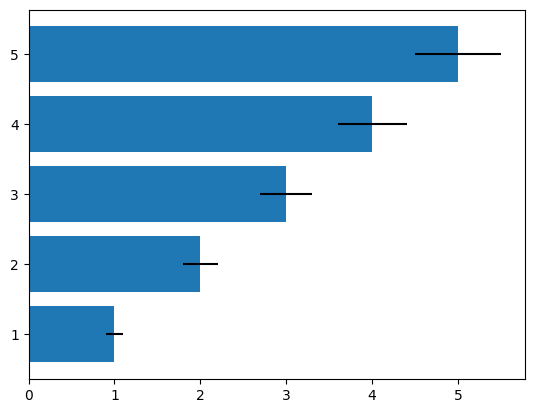

In [13]:
fig, ax = plt.subplots()
ax.barh(x, y, xerr=x_err)
plt.show()

### Stacked bar plots

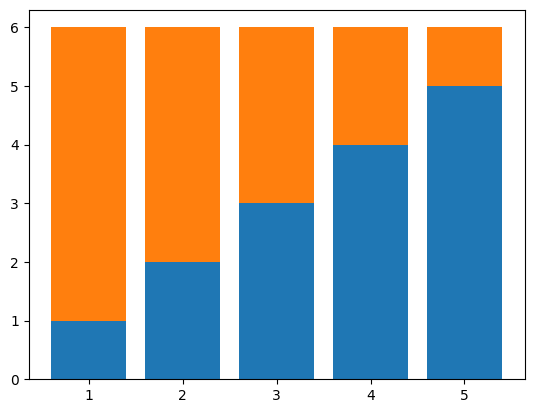

In [14]:
x = [1, 2, 3, 4, 5]
y1 = [1, 2, 3, 4, 5]
y2 = [5, 4, 3, 2, 1]

fig, ax = plt.subplots()
ax.bar(x, y1)
ax.bar(x, y2, bottom=y1)
plt.show()

## Black-and-white bar plots

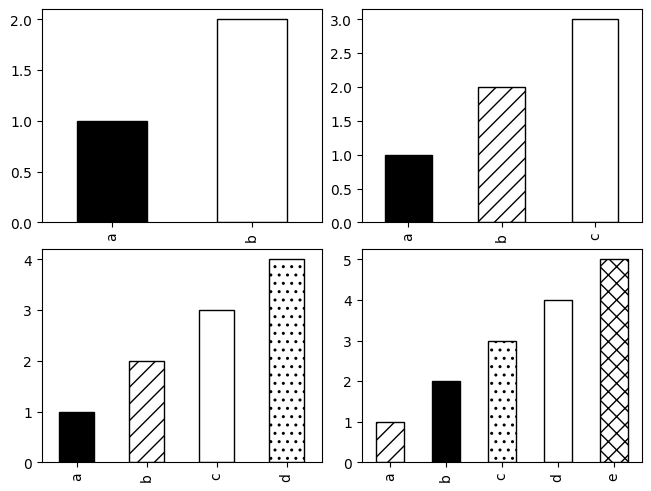

In [15]:
def bw_two_category_bars(ax):
    c = cycler(
        facecolor=["black", "white"],
        edgecolor=["black", "black"],
    )

    for patch, style in zip(ax.patches, c):
        patch.set_facecolor(style["facecolor"])
        patch.set_edgecolor(style["edgecolor"])
    return ax


def bw_three_category_bars(ax):
    c = cycler(
        facecolor=["black", "white", "white"],
        edgecolor=["black", "black", "black"],
        hatch=["", "//", ""],
    )

    for patch, style in zip(ax.patches, c):
        patch.set_facecolor(style["facecolor"])
        patch.set_edgecolor(style["edgecolor"])
        patch.set_hatch(style["hatch"])
    return ax


def bw_four_category_bars(ax):
    c = cycler(
        facecolor=["black", "white", "white", "white"],
        edgecolor=["black", "black", "black", "black"],
        hatch=["", "//", "", ".."],
    )

    for patch, style in zip(ax.patches, c):
        patch.set_facecolor(style["facecolor"])
        patch.set_edgecolor(style["edgecolor"])
        patch.set_hatch(style["hatch"])
    return ax


def bw_five_category_bars(ax):
    c = cycler(
        facecolor=["white", "black", "white", "white", "white"],
        edgecolor=["black", "black", "black", "black", "black"],
        hatch=["//", "", "..", "", "xx"],
    )

    for patch, style in zip(ax.patches, c):
        patch.set_facecolor(style["facecolor"])
        patch.set_edgecolor(style["edgecolor"])
        patch.set_hatch(style["hatch"])
    return ax


fig, axs = plt.subplots(2, 2, layout="constrained")
ax = iter(axs.flatten())

bw_two_category_bars(pd.Series({"a": 1, "b": 2}).plot.bar(ax=next(ax)))
bw_three_category_bars(pd.Series({"a": 1, "b": 2, "c": 3}).plot.bar(ax=next(ax)))
bw_four_category_bars(pd.Series({"a": 1, "b": 2, "c": 3, "d": 4}).plot.bar(ax=next(ax)))
bw_five_category_bars(
    pd.Series({"a": 1, "b": 2, "c": 3, "d": 4, "e": 5}).plot.bar(ax=next(ax))
)
plt.show()

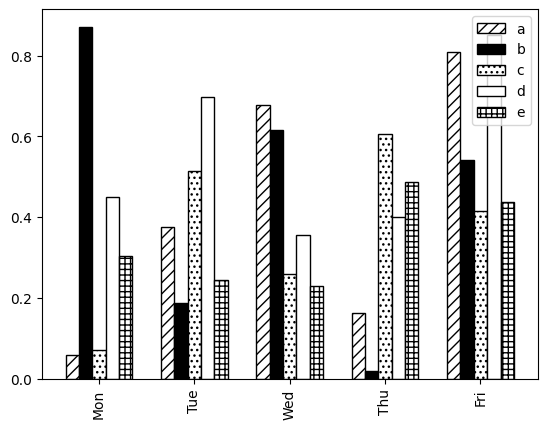

In [16]:
# https://matplotlib.org/stable/gallery/shapes_and_collections/hatch_style_reference.html
# https://medium.com/plaid-design/visually-accessible-data-visualization-ff884121479b

df = pd.DataFrame(
    data=np.random.random((5, 5)),
    index=["Mon", "Tue", "Wed", "Thu", "Fri"],
    columns=["a", "b", "c", "d", "e"],
)
ax = df.plot.bar(
    color=["white", "black", "white", "white", "white"],
    edgecolor="black",
    width=0.7,
)

for row in np.array(ax.patches).reshape(df.shape).T:
    for bar, hatch in zip(row, ["///", "", "...", "", "+++"]):
        bar.set_hatch(hatch)


ax.legend()